In [1]:
### Reloads modules properly
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.sys.path.append('../')

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mplhep as hep
hep.style.use('CMS')
import glob

# Analyzing the generated distribution

In [4]:
!ls -lh /mnt/storage/lborgna/track

total 42G
-rw-r--r-- 1 lborgna users 493M Nov 10 15:34 00.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:34 01.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:35 02.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:35 03.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:36 04.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:36 05.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:37 06.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:37 07.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:38 08.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:38 09.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:40 10.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:41 11.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:42 12.root
-rw-r--r-- 1 lborgna users 483M Nov 10 15:43 13.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:44 14.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:45 16.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:46 17.root
-rw-r--r-- 1 lborgna users 498M Nov 10 15:47 18.root
-rw-r--r-- 1 lborgna users 498M Nov 

In [5]:
path = "/mnt/storage/lborgna/track/"

In [6]:
tp_files = glob.glob(path+'tp_*.pkl')

In [7]:
list_of_df = [] 
for i, file in enumerate(tp_files):
    
    _df = pd.read_pickle(file)
    mask_pv = _df['tp_eventid'] == 0
    mask_no_sv = np.abs(_df['tp_d0'])<0.01
    _df = _df[mask_pv & mask_no_sv]
    
    
    _df.reset_index(inplace=True)
    delta = (i)*(_df.entry.max() + 1)
    _df['entry'] = _df['entry'] + delta
    
    list_of_df.append(_df)

In [8]:
df = pd.concat(list_of_df, ignore_index=True)

In [9]:
true_z0 = df.groupby(['entry'])['tp_z0'].mean()


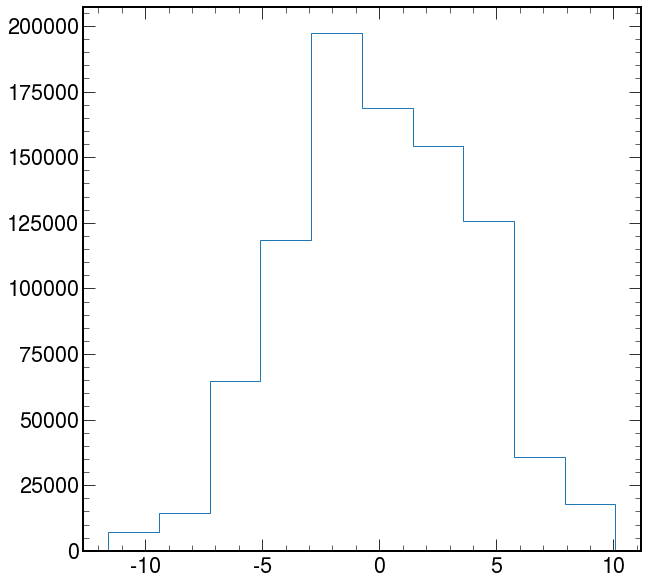

In [11]:
_ = plt.hist(true_z0, bins = 10, histtype='step')

In [12]:
trk = pd.read_pickle(path+'trk_07.pkl')

# debug

In [14]:
import uproot

In [15]:
f = uproot.open(path+'00.root')

In [16]:
f.keys()

['L1TrackNtuple;1', 'L1TrackNtuple/eventTree;1']

In [17]:
t = f['L1TrackNtuple/eventTree;1']

In [18]:
dfs = t.arrays(library='pd')

In [36]:
len(dfs)

3

In [51]:
test_string = dfs[0].columns.to_list()

In [54]:
test_string.

AttributeError: 'list' object has no attribute 'join'

In [44]:
if "trk" in dfs[0].columns.join(''):
    print("hi")

TypeError: Index(...) must be called with a collection of some kind, '' was passed

In [20]:
trk = dfs[0]
tp = dfs[1]

In [25]:
tp

tp_pt    tp_eta    tp_phi    tp_dxy     tp_d0     tp_z0  \
entry subentry                                                                 
0     0         100.300301 -0.898876  0.061430  0.001250  0.000543  3.500762   
      1           2.052715 -1.650001 -2.781972  0.001250  0.000306  3.496469   
      2           6.453084 -0.604645 -2.807965  0.001250  0.000281  3.498704   
      3           8.502528 -0.446424 -1.675735  0.001250  0.001191  3.499362   
      4           7.538472 -1.650967 -1.311853  0.001250  0.001264  3.499881   
...                    ...       ...       ...       ...       ...       ...   
24947 131         2.515927 -1.344955  2.283078  0.000222 -0.000221  7.912414   
      132         2.869779  1.953141 -0.978675  0.000222  0.000216  7.912527   
      133         2.205768 -1.469311 -0.762871  0.003592  0.000253  7.909946   
      134         2.010632 -1.296187  0.080920  0.001015  0.000989 -1.899230   
      135         2.424364 -1.384162  0.262355  0.001015  0.000934 -1.898866   

                tp_d0_prod  tp_z0_prod  tp_pdgid  tp_nmatch  ...  \
entry subentry                                               ...   
0     0          -0.000073    3.499485        13          1  ...   
      1          -0.000297    3.499485       211          1  ...   
      2          -0.000265    3.499485      2212          1  ...   
      3          -0.001218    3.499485      -321          1  ...   
      4          -0.001238    3.499485      -211          1  ...   
...                    ...         ...       ...        ...  ...   
24947 131         0.000219    7.912319     -2212          1  ...   
      132        -0.000213    7.912319       211          1  ...   
      133        -0.000266    7.902583      -321          1  ...   
      134        -0.000991   -1.899601       211          0  ...   
      135        -0.000935   -1.899601      -211          1  ...   

                loosematchtrk_phi  loosematchtrk_z0  loosematchtrk_d0  \
entry subentry                                                          
0     0                  0.061580          3.574219            -999.0   
      1                 -2.782407          3.750000            -999.0   
      2                 -2.808045          3.574219            -999.0   
      3                 -1.675164          3.574219            -999.0   
      4                 -1.310603          3.457031            -999.0   
...                           ...               ...               ...   
24947 131                2.285152          8.144531            -999.0   
      132               -0.979100          7.558594            -999.0   
      133               -0.762705          8.261719            -999.0   
      134             -999.000000       -999.000000            -999.0   
      135                0.264416         -1.933594            -999.0   

                loosematchtrk_chi2  loosematchtrk_bendchi2  \
entry subentry                                               
0     0                   7.661629                0.025519   
      1                   8.667765                1.376251   
      2                   4.947954                1.358919   
      3                   3.709781                0.449784   
      4                  18.657181                0.499871   
...                            ...                     ...   
24947 131                 7.074628                4.988648   
      132                 4.337594                1.048164   
      133                 3.615788                0.278036   
      134              -999.000000             -999.000000   
      135                 6.649461                1.122369   

                loosematchtrk_nstub  loosematchtrk_seed  loosematchtrk_injet  \
entry subentry                                                                 
0     0                           6                   0                    1   
      1                           6                   0                    0   
      2           

In [24]:
trk

trk_pt   trk_eta   trk_phi  trk_d0    trk_z0   trk_chi2  \
entry subentry                                                              
0     0         3.294195  0.672711 -0.235986   999.0 -7.207031   3.886195   
      1         3.299082  0.070255 -0.303737   999.0  5.800781   3.457583   
      2         4.282707  1.931356 -0.272299   999.0 -7.558594   2.652499   
      3         2.730331 -1.494013 -0.168791   999.0  0.000000   3.931520   
      4         2.346045  1.780082  0.038812   999.0  0.117188  25.375839   
...                  ...       ...       ...     ...       ...        ...   
24947 134       2.178273 -1.970004 -1.128330   999.0  4.160156   6.256404   
      135       2.364003  0.895117 -0.621172   999.0  8.554688   2.396245   
      136       2.195913 -1.472945 -0.762705   999.0  8.261719   3.615788   
      137       2.516502 -1.896394 -0.741756   999.0  5.917969  20.023378   
      138       2.317679 -0.433555 -0.270725   999.0  4.160156   8.480442   

                trk_bendchi2  trk_nstub  trk_lhits  trk_dhits  ...  trk_fake  \
entry subentry                                                 ...             
0     0             0.565463          6     111111          0  ...         2   
      1             1.158106          6     111111          0  ...         2   
      2             1.138293          6         11       1111  ...         2   
      3             0.562027          5        111        110  ...         2   
      4             0.787909          6         11      10111  ...         2   
...                      ...        ...        ...        ...  ...       ...   
24947 134           1.619150          6         11       1111  ...         2   
      135           2.362869          5      11111          0  ...         2   
      136           0.278036          6        111        111  ...         2   
      137           0.897107          6         11       1111  ...         2   
      138           1.150294          6     111111          0  ...         2   

                trk_matchtp_pdgid  trk_matchtp_pt  trk_matchtp_eta  \
entry subentry                                                       
0     0                       211        3.307104         0.678369   
      1                      -211        3.333383         0.069476   
      2                      -211        4.196679         1.933154   
      3                       211        2.740556        -1.497854   
      4                      2212        2.332434         1.780198   
...                           ...             ...              ...   
24947 134                    -211        2.198662        -1.968237   
      135                     211        2.396504         0.890380   
      136                    -321        2.205768        -1.469311   
      137                    -211        2.740320        -1.867672   
      138                     211        2.319110        -0.436025   

                trk_matchtp_phi  trk_matchtp_z0  trk_matchtp_dxy  trk_injet  \
entry subentry                                                                
0     0               -0.236771       -7.436831         0.001133          0   
      1               -0.302832        5.946478         0.000195          0   
      2               -0.270587       -7.436831         0.001133          0   
      3               -0.169511        0.002524         0.000285          0   
      4                0.041637        0.094147         0.001353          0   
...                         ...             ...              ...        ...   
24947 134             -1.126952        4.718006         0.000750          0   
      135             -0.620746        8.725403         0.001624          0   
      136             -0.762871        7.902583         0.003592          0   
      137             -0.741082        4.255000         0.002025          0   
      138             -0.270723        4.255000         0.002025          0   

                trk_injet_highpt  tr

In [26]:
diff = trk['trk_z0'] - trk['trk_matchtp_z0']

Text(1, 0, 'trk_z0 - trk_matchtp_z0')

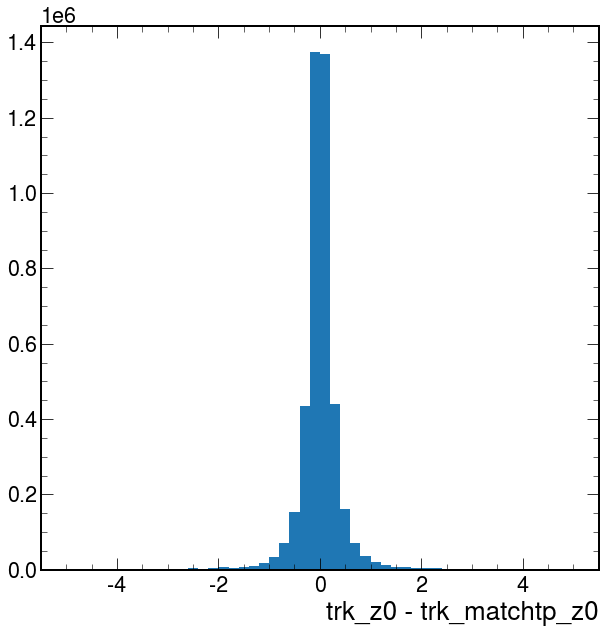

In [34]:
_=plt.hist(diff, bins = 50, range = (-5, 5))
plt.xlabel('trk_z0 - trk_matchtp_z0')

In [31]:
diff_pt = trk['trk_pt'] - trk['trk_matchtp_pt'] 

Text(1, 0, 'trk_pt - trk_matchtp_pt')

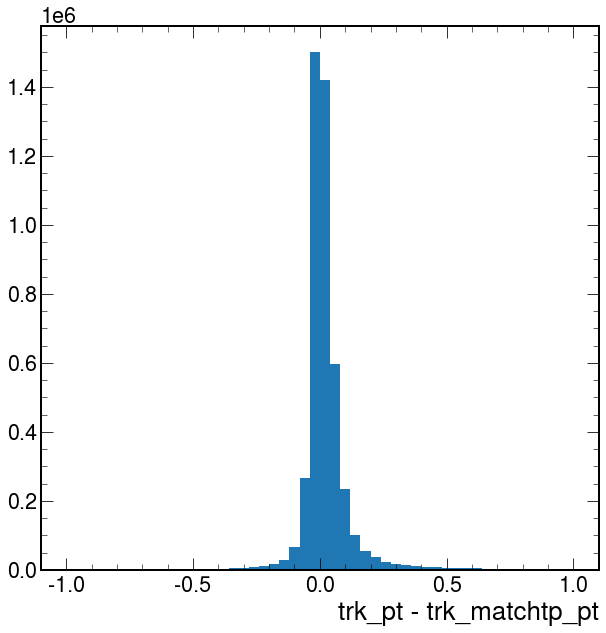

In [35]:
_ = plt.hist(diff_pt, bins=50, range=(-1,1))
plt.xlabel('trk_pt - trk_matchtp_pt')